## Name - Hitesh Choudhary

## Batch - August

## Golden Project -  Uber Data Analysis

## Import Library

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv("/content/UberDataset.csv")
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [23]:
df.shape   # shape of data

(1156, 7)

In [24]:
df.dtypes   # data types

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [25]:
df.isna().sum()    # Null values

START_DATE      0
END_DATE        1
CATEGORY        1
START           1
STOP            1
MILES           0
PURPOSE       503
dtype: int64

In [26]:
except_purpose = df.drop(columns=['PURPOSE'])                     # Filling Null Values
data = except_purpose.apply(lambda x: x.fillna(x.value_counts().index[0]))
data['PURPOSE'] = df['PURPOSE']

In [27]:
data.isna().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       503
dtype: int64

In [28]:
data = data.replace(np.nan, 'Unknown')    # As Prupose attribute seems to be one of the important attribute and contains 503 mising values so i replace missing values with "Unknown"

In [29]:
data.drop_duplicates()  # Removing Duplicate

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting
1153,12/31/2016 21:32,12/31/2016 21:50,Business,Katunayake,Gampaha,6.4,Temporary Site
1154,12/31/2016 22:08,12/31/2016 23:51,Business,Gampaha,Ilukwatta,48.2,Temporary Site


In [30]:
data = data.iloc[0:1154,:]   # Removing last column it contains a outlier
data

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
...,...,...,...,...,...,...,...
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit
1150,12/31/2016 1:07,12/31/2016 1:14,Business,Kar?chi,Kar?chi,0.7,Meeting
1151,12/31/2016 13:24,12/31/2016 13:42,Business,Kar?chi,Unknown Location,3.9,Temporary Site
1152,12/31/2016 15:03,12/31/2016 15:38,Business,Unknown Location,Unknown Location,16.2,Meeting


## Exploratory Data Analysis

In [31]:
pd.crosstab(data['CATEGORY'],data['PURPOSE'],margins = True)

PURPOSE,Airport/Travel,Between Offices,Charity ($),Commute,Customer Visit,Errand/Supplies,Meal/Entertain,Meeting,Moving,Temporary Site,Unknown,All
CATEGORY,,,,,,,,,,,,
Business,3,18,0,0,101,128,160,187,0,49,431,1077
Personal,0,0,1,1,0,0,0,0,4,0,71,77
All,3,18,1,1,101,128,160,187,4,49,502,1154


Text(0.5, 1.0, 'Countplot of Purpose for Travelling by Uber')

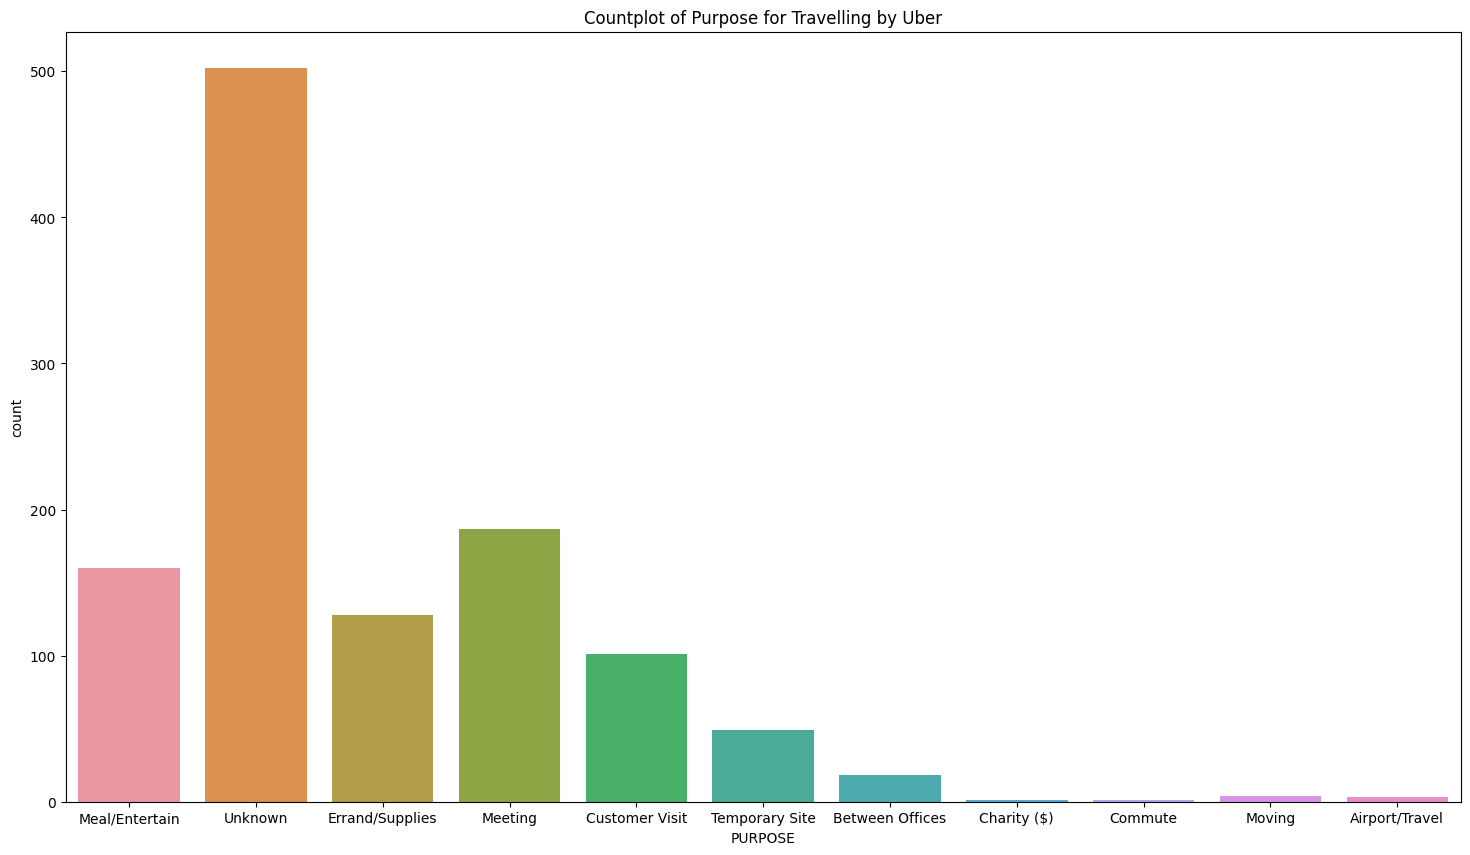

In [32]:
plt.figure(figsize = (18,10))
sns.countplot(x = data['PURPOSE'])
plt.title("Countplot of Purpose for Travelling by Uber")

In [33]:
business_travelled = data[data['CATEGORY']=='Business']
business_travelled = business_travelled['MILES'].sum()
print("Total Travelled by personal_category is : ",business_travelled)

Total Travelled by personal_category is :  11438.8


In [34]:
personal_travelled = data[data['CATEGORY']=='Personal']
personal_travelled = personal_travelled['MILES'].sum()
print("Total Travelled by personal_category is : ",personal_travelled)

Total Travelled by personal_category is :  717.6999999999999


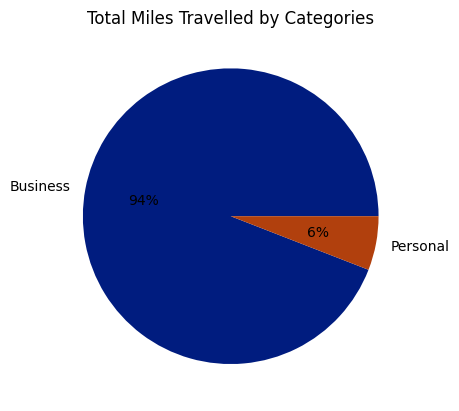

In [35]:
list_miles_per_category = [11438.8 , 717.6999999999999]
list_per_category = ['Business' , 'Personal']
palette_color = sns.color_palette('dark')
plt.pie(list_miles_per_category , labels = list_per_category ,colors=palette_color,autopct='%.0f%%')
plt.title('Total Miles Travelled by Categories')
plt.show()

In [36]:
data.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,Unknown
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [37]:
data.pivot_table(data, index = ['PURPOSE','CATEGORY'])

,,MILES
PURPOSE,CATEGORY,
Airport/Travel,Business,5.500000
Between Offices,Business,10.944444
Charity ($),Personal,15.100000
Commute,Personal,180.200000
Customer Visit,Business,20.688119
Errand/Supplies,Business,3.968750
Meal/Entertain,Business,5.698125
Meeting,Business,15.247594
Moving,Personal,4.550000
